In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [2]:
!nvidia-smi

Tue Jun 29 16:05:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [4]:
# CLICK ME
from fastai.vision.all import * #IMPORT 
path = untar_data(URLs.PETS)/'images' #DATA SET 

def is_cat(x): return x[0].isupper() #Labels for the dataset (This dataset cat labels begin w/ uppercase letter)

#Create dataset (Training data, test data) and correctly gets imgs w/ labels
dls = ImageDataLoaders.from_name_func( 
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate) #Creating architecture
learn.fine_tune(1) #Training

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.173497,0.022808,0.006766,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.064119,0.009997,0.002706,02:15


### Sidebar: This Book Was Written in Jupyter Notebooks

In [ ]:
1+1

2

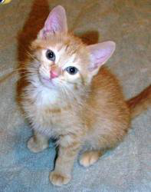

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])

In [ ]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999998


### What Is Machine Learning?

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func( #Segmentation
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


epoch,train_loss,valid_loss,time
0,2.726898,8.244021,00:01


epoch,train_loss,valid_loss,time
0,2.506084,1.946429,00:01
1,2.022527,1.353551,00:01
2,1.703559,1.124026,00:01
3,1.476682,0.957994,00:01
4,1.298435,0.797687,00:01
5,1.155205,0.730903,00:01
6,1.039784,0.699207,00:01
7,0.951593,0.695350,00:01


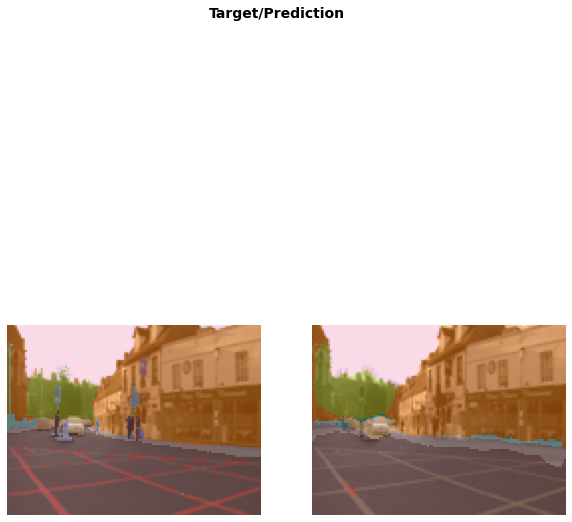

In [ ]:
learn.show_results(max_n=1, figsize=(10,12))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.472601,0.388885,0.824040,03:45


epoch,train_loss,valid_loss,accuracy,time
0,0.281602,0.250850,0.895240,07:24
1,0.227719,0.198713,0.922400,07:25


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0228, 0.9772]))

### Sidebar: The Order Matters

### End sidebar

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.372949,0.361306,0.833077,00:05
1,0.354939,0.348455,0.841830,00:05
2,0.349614,0.347378,0.840756,00:05


In [8]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523757,1.424118,00:00


epoch,train_loss,valid_loss,time
0,1.376706,1.363828,00:00
1,1.282471,1.173324,00:00
2,1.034186,0.848724,00:00
3,0.805283,0.694374,00:00
4,0.709625,0.654900,00:00
5,0.652975,0.645875,00:00
6,0.634861,0.639299,00:00
7,0.611313,0.637229,00:00
8,0.617857,0.636715,00:00
9,0.612095,0.636567,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,87.0,48.0,5.0,4.045295
1,73.0,92.0,4.0,4.072179
2,66.0,26.0,3.0,4.015839
3,66.0,30.0,3.0,3.367572
4,4.0,46.0,3.5,3.269851
5,82.0,84.0,4.0,3.817361
6,90.0,79.0,4.0,4.012848
7,61.0,65.0,4.0,3.507185
8,88.0,7.0,4.5,4.166433


### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. **Do you need these for deep learning?**

   - Lots of math T / **F**
   - Lots of data T / **F**
   - Lots of expensive computers T / **F**
   - A PhD T / **F**
   
1. **Name five areas where deep learning is now the best in the world.** </br>
Vision, Natural language processing, Medicine, Robotics, and Games
1. **What was the name of the first device that was based on the principle of the artificial neuron?** </br>
Mark I Perceptron
1. **Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?** </br>
Processing units, State of activation, Output function, Pattern of connectivity, Propagation rule, Activation rule, Learning rule, Environment
1. **What were the two theoretical misunderstandings that held back the field of neural networks?** </br>
Single layer network unable to learn simple mathimatical functions.</br>
More layers make network too big and slow to be useful.
1. **What is a GPU?**</br>
A graphics card is a processor that can handle 1000's of tasks at the same time. Particularly great for deep learning.
1. **Open a notebook and execute a cell containing: `1+1`. What happens?** </br>
2
1. **Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.**
1. **Complete the Jupyter Notebook online appendix.**
1. **Why is it hard to use a traditional computer program to recognize images in a photo?** </br>
They are missing the weight assignment needed to recognize patterns within images to accomplish the task.
1. **What did Samuel mean by "weight assignment"?**</br>
The weight is another form of input that has direct influence on the model's performance.
1. **What term do we normally use in deep learning for what Samuel called "weights"?**</br> 
Parameters
1. **Draw a picture that summarizes Samuel's view of a machine learning model.**</br>
<img src="https://vikramriyer.github.io/assets/images/machine_learning/fastai/model.jpeg"> #Found online
1. **Why is it hard to understand why a deep learning model makes a particular prediction?**</br> 
There are many layers, each with numerous neurons. Therefore, it gets complex really fast what each neuron is looking for when viewing an image, and how that impacts the perediction.  
1. **What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?**</br>
Universal approximation theorem 
1. **What do you need in order to train a model?**</br>
Data with labels
1. **How could a feedback loop impact the rollout of a predictive policing model?**</br> 
The more the model is used the more biased the data becomes, and therefore, the more bias the model becomes. 
1. **Do we always have to use 224×224-pixel images with the cat recognition model?**</br>
No.
1. **What is the difference between classification and regression?**</br>
Classification is about categorizing/labeling objects. </br>
Regression is about predicting numerical quantities, such as temp.
1. **What is a validation set? What is a test set? Why do we need them?**</br>
The validation set measures the accuracy of the model during training. </br>
The test set is used during the final evaluation to test the accuracy of the model. </br></br>
We need both of them because the validation set could cause some bias in the model as we would are fitting the model towards it during training. However, the test set removes this and evaluates the model on unseen data, thereby, giving an accurate metric of accuracy.  
1. **What will fastai do if you don't provide a validation set?**</br>
Fastai will automatically create a validation dataset for us. 
1. **Can we always use a random sample for a validation set? Why or why not?**</br>
It is not reccomended where order is neccessary, example ordered by time.
1. **What is overfitting? Provide an example.**</br>
This is when the model begins to fit to the training data rather than generalizing for similar unseen datasets. For example a model that does amazing on the training data, but performs poorly on test data: Good indication that model may have overfitted. 
1. **What is a metric? How does it differ from "loss"?**</br>
The loss is the value calculated by the model to determine the impact each neuron has on the end result: Therefore, the value is used by models to measure its performance. The metric gives us, humans, an overall value of how accurate the model was: Therefore, a value we use to understand the models performance. 
1. **How can pretrained models help?**</br>
A pretrained model already has the fundementals. Therefore, it can use this prior knowledge to learn faster and perform better on similer datasets.
1. **What is the "head" of a model?**</br> 
The final layers from the pretrained model that have been replaced with new layers (w/ randomized weights) to better align with our dataset. These final layers are often the only thing trained while the rest of the model is frozen.
1. **What kinds of features do the early layers of a CNN find? How about the later layers?**</br>
The early layers often extract simple features like edges. </br>
The later layers are more complex and can identify advanced features like faces.
1. **Are image models only useful for photos?**</br>
No. Lots of other forms of data can be converted into images that can be used to solve such non-photo data problems. 
1. **What is an "architecture"?**</br>
This is the structure of the model we use to solve the problem.
1. **What is segmentation?**</br>
Method of labeling all pixels within an image and masking it.
1. **What is `y_range` used for? When do we need it?**</br>
Specifies the range of values that can be perdicted by model. For example, movie rating's 0-5.
1. **What are "hyperparameters"?**</br>
These are the parameters that we can adjust to help the model perform better (Ex: Epochs). 
1. **What's the best way to avoid failures when using AI in an organization?**</br>
Begin with the most simplest model and then slowly building up to more complexity. This way you have something working and don't get lost as you add onto the model. 


### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. **Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?** </br>
Modern GPUs provide a far superior processing power, memory bandwidth, and efficiency over the CPU. 

1. **Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.** </br>
I believe feedback loops are primarly great for recommendation models. This is because the feedback loops create a bias model. For example, if a viewer like a movie, he/she will like similer movies. Being bias here towards particular types of movie is the best way to keep the viewer engaged.